In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
# Программу написал Куцевалов Данила Вячеславович ПМиИ Мех-мат 2021г

In [2]:
# 8 вариант
# x = [102, 85, 88, 62, 107, 60, 53, 40, 22, 32]
# y = [3.7, 4.3, 3.5, 3.8, 4.2, 3.0, 3.2, 2.5, 2.8, 2.6]
# X_0 = 75

# 7 вариант
x = [45, 30, 38, 65, 91, 68, 94, 89, 106, 96]
y = [2.3, 2.4, 1.9, 1.7, 2.3, 4.3, 3.1, 2.6, 4.9, 3.6]
X_0 = 75

alpha = 0.05

n = len(x)
k = n-2 # степень свободы

df = pd.DataFrame(columns=['x', 'y'], data=zip(x, y))

In [3]:
x_ = np.sum(df['x']) / n
S2_x = np.sum(np.square(df['x'])) / n - np.square(x_)
S_x = np.sqrt(S2_x)

y_ = np.sum(df['y']) / n
S2_y = np.sum(np.square(df['y'])) / n - np.square(y_)
S_y = np.sqrt(S2_y)

xy_ = np.sum(df['x'] * df['y']) / n

r = (xy_ - x_ * y_) / (S_x * S_y)

t_nablud = r * np.sqrt(k/(1-np.square(r)))
t_krit = stats.t.ppf(1- alpha/2, k) # Проверил, с табличкой совпадает

corr_far_from_zero = np.abs(t_nablud) > t_krit

print('x_: {:.4f}  S^2_x: {:.4f}  S_x: {:.4f}'.format(x_, S2_x, S_x))
print('y_: {:.4f}  S^2_y: {:.4f}  S_y: {:.4f}'.format(y_, S2_y, S_y))
print('xy_: {:.4f}  r: {:.4f} '.format(xy_, r))
print('t наблюдаемое: {:.4f}  t критическое: {:.4f} '.format(t_nablud, t_krit))

if corr_far_from_zero:
    print('Коэфф. корреляции значимо отличается от 0.')
else:
    print('Коэфф. корреляции отличается от 0 незначительно.')

x_: 72.2000  S^2_x: 657.9600  S_x: 25.6507
y_: 2.9100  S^2_y: 0.9989  S_y: 0.9994
xy_: 224.7700  r: 0.5722 
t наблюдаемое: 1.9732  t критическое: 2.3060 
Коэфф. корреляции отличается от 0 незначительно.


In [4]:

# Строим уравнение лин. регрессии
# y_x_ = y_ + r* S_y / S_x * (x - x_)
# Упростим:
# y_x_ = (r* S_y / S_x) * x + (y_ - r* S_y / S_x * x_)

a = r * (S_y / S_x)
b = y_ - r * (S_y / S_x) * x_

# Уравнение простейшей линейной регрессии
def y_x_(x):
    return a*x + b

print('Уравнение регрессии: y_x_ = {:.4f}*x + {:.4f}'.format(a, b))

Уравнение регрессии: y_x_ = 0.0223*x + 1.3004


In [5]:
# Прогнозируем известные значения
df['y\''] = y_x_(df['x'])

# Ищем максимальную ошибку
df['error'] = np.abs(df['y\''] - df['y'])
max_err = np.max(df['error'])
print('Максимальная ошибка: {:.4f}'.format(max_err))

Максимальная ошибка: 1.4836


In [6]:
# вычисляем значение в точке X_0 (она же X*)
Y_0 = y_x_(X_0)
print('X*: {}  Y*: {:.4f}'.format(X_0, Y_0))

X*: 75  Y*: 2.9724


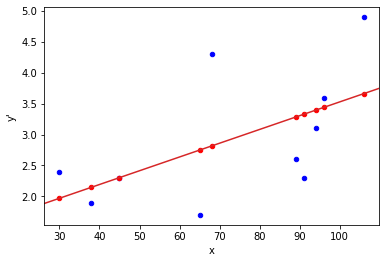

In [7]:
# Строим диаграмму рассеяния
ax1 = df.plot(kind='scatter', x='x', y='y', color='blue', grid=True)
ax2 = df.plot(kind='scatter', x='x', y='y\'', color='red', ax=ax1)

point1 = (df['x'].iloc[0], df['y\''].iloc[0])
point2 = (df['x'].iloc[-1], df['y\''].iloc[-1])
ax2.axline(point1, point2, color='C3')


In [8]:
# Выводим отсортированную по x таблицу
df.sort_values('x').round(4) # Округление до 4 знаков


,x,y,y',error
1,30,2.4,1.9692,0.4308
2,38,1.9,2.1476,0.2476
0,45,2.3,2.3036,0.0036
3,65,1.7,2.7495,1.0495
5,68,4.3,2.8164,1.4836
7,89,2.6,3.2845,0.6845
4,91,2.3,3.3291,1.0291
6,94,3.1,3.3960,0.2960
9,96,3.6,3.4406,0.1594
8,106,4.9,3.6635,1.2365
